# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Question

Which individuals are most likely to have or use a bank account?

### b) Defining the Metric for Success

##### For this analysis, the following areas must be covered:

##### Exploratory Data Analysis using,
1. Univariate Analysis.
2. Bivariate Analysis.
3. Multivariate Analysis.
4. Using Visualizations.

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

The elements of the checklist are

1. Formulating the question
2. Reading in your data
3. Checking the data
4. Doing the Univariate, Bivariate and Multivariate Analysis
5. Visualizating the data
6. Challenging the solution
7. Conclusion and Recommendation

### e) Data Relevance

Dataset

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

 The dataset can be found here  http://bit.ly/FinancialDataset and the variable definitions http://bit.ly/VariableDefinitions



## 2. Reading the Data

In [2]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'http://bit.ly/FinancialDataset'

df = pd.read_csv(url)

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
#

df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

<AxesSubplot:>

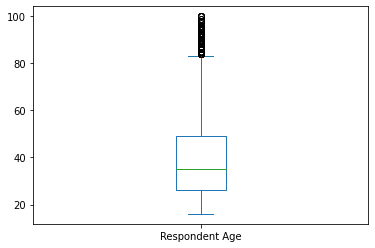

In [7]:
# Checking for Outliers
#
# Respondent Age
df['Respondent Age'].plot.box()

In [8]:
# We shall not be removing the Outliers on age since it represents real personal data

<AxesSubplot:>

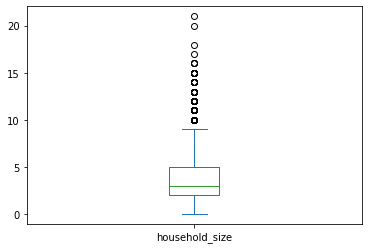

In [9]:
# Checking outliers for household_size

df['household_size'].plot.box()

In [10]:
# Removing outliers from the Household size column

# # Percentile based outlier removal on the House_size Column

# percentile based outlier removal

# minimum and maximum values
min_limit, max_limit = df.household_size.quantile([0.01, 0.99])
min_limit, max_limit

# places where the household_size is less than 1%
df[df.household_size < min_limit].head()

# places where the household_size is greater than 99%
df[df.household_size > max_limit].head()

# creating a new dataframe with the outliers removed
df = df[(df.household_size > min_limit) & (df.household_size < max_limit)]
df.shape

(19116, 13)

In [11]:
# Checking for Anomalies
#
# Duplicates

df.duplicated().sum()

0

In [12]:
# Identifying the Missing Data
#

In [13]:
# Dealing with the Missing Data
#
# Checking Null

df.isnull().sum()

country                    9
year                       0
uniqueid                   0
Has a Bank account        25
Type of Location           9
Cell Phone Access          7
household_size             0
Respondent Age            23
gender_of_respondent      18
The relathip with head     0
marital_status            21
Level of Educuation       25
Type of Job               26
dtype: int64

In [14]:
# Dropping the Null

df.dropna(inplace=True)
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [15]:

# More data cleaning procedures
#
# Checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19003 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19003 non-null  object 
 1   year                    19003 non-null  int64  
 2   uniqueid                19003 non-null  object 
 3   Has a Bank account      19003 non-null  object 
 4   Type of Location        19003 non-null  object 
 5   Cell Phone Access       19003 non-null  object 
 6   household_size          19003 non-null  float64
 7   Respondent Age          19003 non-null  float64
 8   gender_of_respondent    19003 non-null  object 
 9   The relathip with head  19003 non-null  object 
 10  marital_status          19003 non-null  object 
 11  Level of Educuation     19003 non-null  object 
 12  Type of Job             19003 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [16]:
# Removing irrelevant columns
# 
df = df.drop(['uniqueid', 'The relathip with head'], axis = 1)

In [60]:
# Changing Column Names
df.columns
df.rename(columns={'level_of_educuation':'level_of_education', 'Has a Bank account':'Has_Bank_account',
                   'type_of_location':'location_type','respondent_age':'age',
                   'gender_of_respondent':'gender',
                   'Level of Educuation':'Education_level','Type of Job':'Job_type'}, inplace=True)

## 6. Exploratory Analysis

#### Univariate Summaries and Analysis

In [61]:
# Getting a frequency table of the number of people with a bank account
# 
pd.crosstab(index=df.Has_Bank_account, columns='count')

#  Most respondents have a bank account

col_0,count
Has_Bank_account,
No,16423
Yes,2580


<AxesSubplot:title={'center':'Freq dist of Country'}>

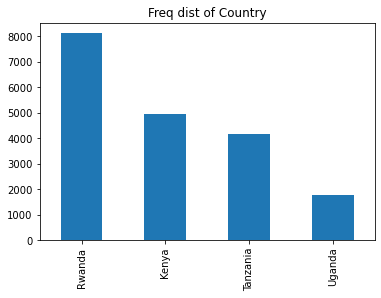

In [18]:
# Ploting the univariate summaries and recording our observations
#
# Categorial data - we shall use bar graph

# Based on country

df['country'].value_counts().plot.bar(title='Freq dist of Country')

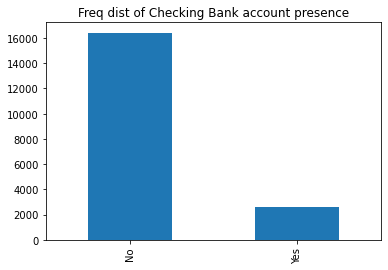

In [19]:
# Based on Checking Bank account presence

df['Has_Bank_account'].value_counts().plot.bar(title='Freq dist of Checking Bank account presence')
plt.show()

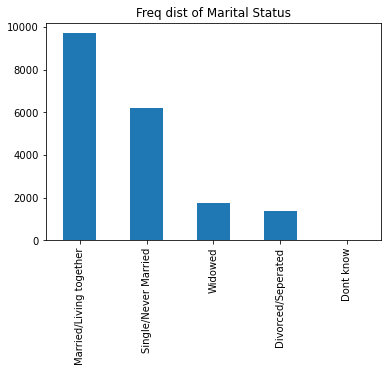

In [20]:
# Based on Marital Status

df['marital_status'].value_counts().plot.bar(title='Freq dist of Marital Status')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

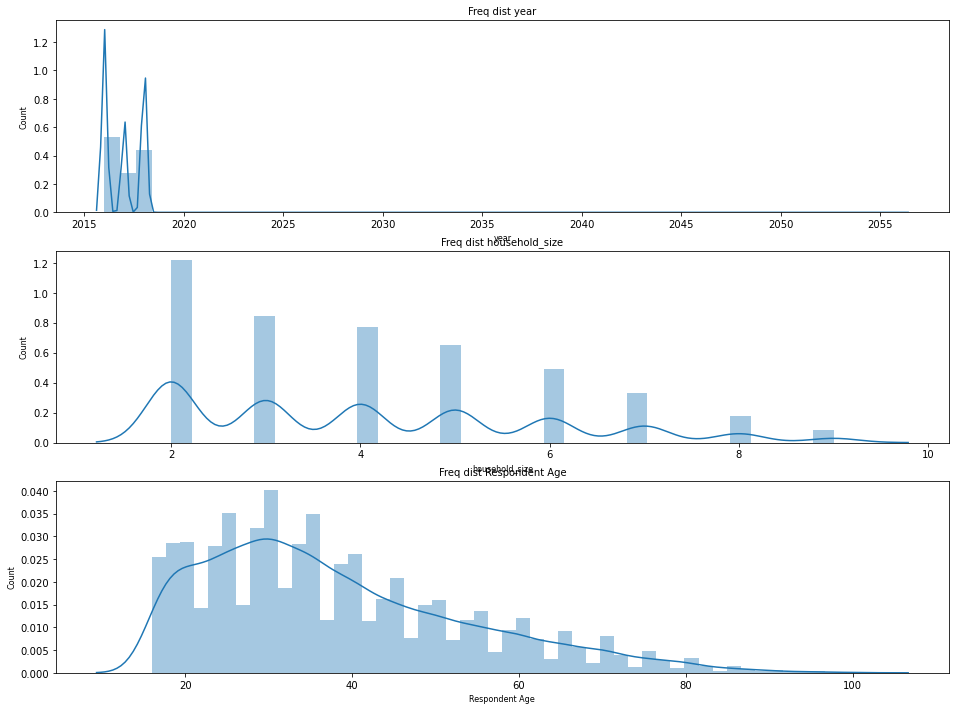

In [21]:
# Numerical data - we shall use histogram


col_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#### Describing data

In [22]:
df.describe()

,year,household_size,Respondent Age
count,19003.00000,19003.000000,19003.000000
mean,2016.92959,4.104194,38.024522
std,0.94245,1.885018,15.926177
min,2016.00000,2.000000,16.000000
25%,2016.00000,2.000000,26.000000
50%,2017.00000,4.000000,35.000000
75%,2018.00000,5.000000,47.000000
max,2056.00000,9.000000,100.000000


#### Bivariate Summaries and Analysis

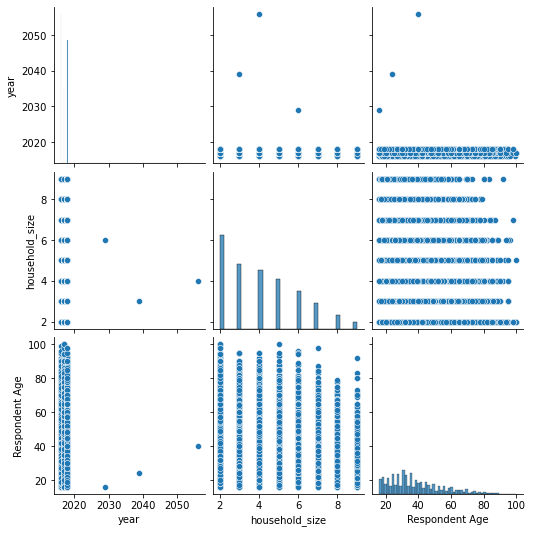

In [23]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

In [24]:
# Checking the skewness
df[['household_size','Respondent Age']].skew()

# Both Household size and Responded age are positive skewed and shows low existence of outliers

household_size    0.648636
Respondent Age    0.865840
dtype: float64

In [25]:
# Checking the kurtosis
df[['household_size','Respondent Age']].kurt()

# The household_size is platykurtic while Respondent Age is leptokurtic

household_size   -0.484855
Respondent Age    0.237882
dtype: float64

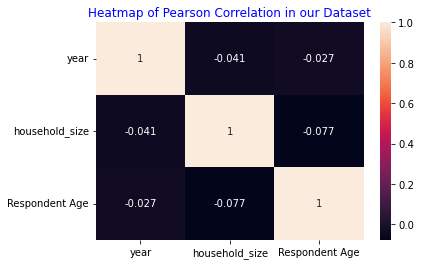

In [67]:
# Checking the Pearson's correlation

sns.heatmap(df[['year','household_size','Respondent Age']].corr(),annot=True)
plt.title('Heatmap of Pearson Correlation in our Dataset', color='blue')
plt.show()

In [27]:
# Household_size and Responded Age have a weak inverse correlation

#### Multivariate Summaries and Analysis

##### Principal Component Analysis

In [29]:
# Preprocessing

X = df.drop(columns = ['country', 'Has_Bank_account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age', 'gender',
       'marital_status', 'Education_level', 'Job_type'], axis = 1)
y = df['Has_Bank_account']



In [30]:
# Divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# Normalization
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
 # Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [33]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([1.])

In [34]:
# Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
# Training and Making Predictions
# We'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 3316 out of 3801 instances, 
# resulting in 87.24% accuracy.

[[3316    0]
 [ 485    0]]
Accuracy:  0.8724019994738227


### Visualizating features having relationship with Bank account

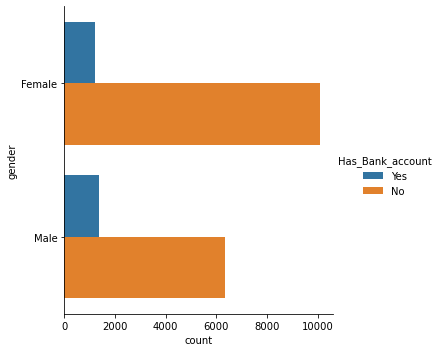

In [93]:
# Gender vs having bank a/c

sns.catplot( y='gender', kind="count", hue="Has_Bank_account", data=df)
plt.show()

# Men are more likely to have a bank account than women

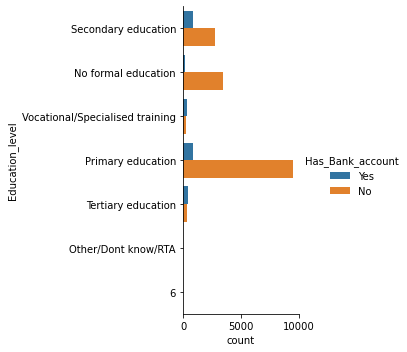

In [110]:
# The Education level
sns.catplot( y='Education_level', kind="count", hue="Has_Bank_account", data=df)
plt.show()

#  People with some form of higher education are more likely to have a bank account



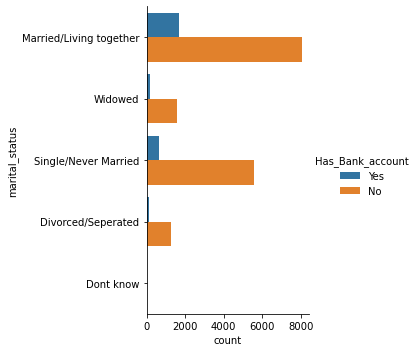

In [92]:
# Marital status
sns.catplot( y='marital_status', kind="count", hue="Has_Bank_account", data=df)
plt.show()

# Married people or living with their spouses are more likely to have a bank account as compared to other groups

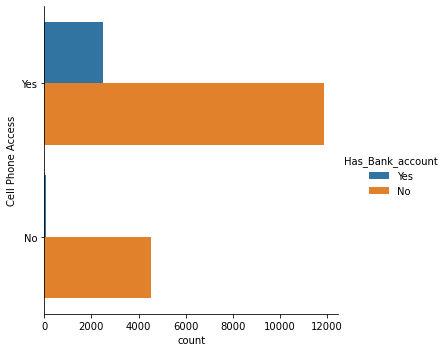

In [99]:
# Having Cell phone

sns.catplot( y='Cell Phone Access', kind="count", hue="Has_Bank_account", data=df)
plt.show()

# People with access to a cellphone are likely to have a bank account.

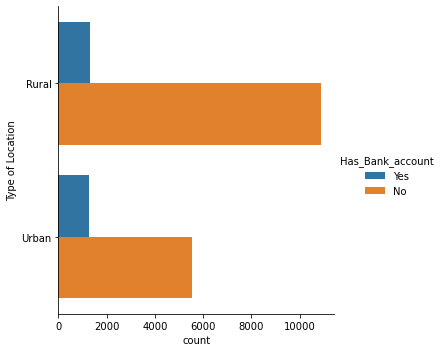

In [105]:
# Type of Location 
sns.catplot( y='Type of Location', kind="count", hue="Has_Bank_account", data=df)
plt.show()

# No much difference between Urban and Rural, hence the Type of Loaction feature cannot be used a prediction of having a bank account

## 7. Follow up questions

We had the correct information from the dataset. Also the dataset includes crucial information from respondents about whether or not they have a bank account. We have information about the respondents, such as their nation, age, whether or not they have access to a cellphone, where they live, the size of their household, their marital status, their educational level, and the type of job they have. These details have aided us on the analysis process to determine whether or not a person has a bank account.

### a). Did we have the right data?

Definately, we would need additional information to check more factors that may affect whether a person has a bank acount. 

# b). Do we need other data to answer our question?

### c). Did we have the right question?

Rather than forecasting who is most likely to have or use a bank account, the inquiry should have been about visualizing financial data across the three countries to see who has one and who does not.



## 8. Conclusion

The following attributes can be used to predict whether or not an individual would have or utilize a bank account based on univariate, bivariate and multivariate analysis:

1. Marital Status
2. Level of Education 
3. Type of Job
4. Access to a Cell phone